In [2]:
import pandas as pd

In [3]:
chunksize = 10 ** 6
num_of_chunks = 0
train = pd.DataFrame()

for chunk in pd.read_csv('/home/stefan/Documents/projects/data/avazu-ctr-prediction/train', chunksize=chunksize):
    num_of_chunks += 1
    train = pd.concat([train, chunk.sample(frac=0.5, replace=False, random_state=1234)], axis=0)
    print(f'Processing chunk number: {num_of_chunks}')

train.reset_index(inplace=True)
train_len = len(train)
train_len

Processing chunk number: 1
Processing chunk number: 2
Processing chunk number: 3
Processing chunk number: 4
Processing chunk number: 5
Processing chunk number: 6
Processing chunk number: 7
Processing chunk number: 8
Processing chunk number: 9
Processing chunk number: 10
Processing chunk number: 11
Processing chunk number: 12
Processing chunk number: 13
Processing chunk number: 14
Processing chunk number: 15
Processing chunk number: 16
Processing chunk number: 17
Processing chunk number: 18
Processing chunk number: 19
Processing chunk number: 20
Processing chunk number: 21
Processing chunk number: 22
Processing chunk number: 23
Processing chunk number: 24
Processing chunk number: 25
Processing chunk number: 26
Processing chunk number: 27
Processing chunk number: 28
Processing chunk number: 29
Processing chunk number: 30
Processing chunk number: 31
Processing chunk number: 32
Processing chunk number: 33
Processing chunk number: 34
Processing chunk number: 35
Processing chunk number: 36
P

20214484

In [4]:
train.head(5)

,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,433572,7.582956e+18,1,14102102,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,...,1,0,19251,320,50,2201,3,35,-1,43
1,254298,9.742865e+17,0,14102101,1005,0,85f751fd,c4e18dd6,50e219e0,9f06e9a1,...,1,0,21611,320,50,2480,3,297,100111,61
2,686334,1.181355e+19,0,14102104,1005,0,5bcf81a2,9d54950b,f028772b,ecad2386,...,1,0,21665,320,50,2493,3,35,100052,117
3,866486,6.536410e+18,0,14102104,1005,0,85f751fd,c4e18dd6,50e219e0,7e7baafa,...,1,0,21665,320,50,2493,3,35,100171,117
4,649015,9.290309e+18,1,14102103,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15702,320,50,1722,0,35,-1,79


In [4]:
from sys import getsizeof
getsizeof(train)

14412927236

In [8]:
import numpy as np
pd.set_option('display.precision', 3)
train.describe()

,index,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07,2.021e+07
mean,2.021e+07,9.223e+18,1.698e-01,1.410e+07,1.005e+03,2.880e-01,1.015e+00,3.315e-01,1.884e+04,3.189e+02,6.010e+01,2.113e+03,1.432e+00,2.271e+02,5.321e+04,8.339e+01
std,1.167e+07,5.326e+18,3.755e-01,2.967e+02,1.095e+00,5.064e-01,5.275e-01,8.550e-01,4.958e+03,2.131e+01,4.728e+01,6.093e+02,1.326e+00,3.509e+02,4.996e+04,7.029e+01
min,0.000e+00,5.212e+11,0.000e+00,1.410e+07,1.001e+03,0.000e+00,0.000e+00,0.000e+00,3.750e+02,1.200e+02,2.000e+01,1.120e+02,0.000e+00,3.300e+01,-1.000e+00,1.000e+00
25%,1.011e+07,4.611e+18,0.000e+00,1.410e+07,1.005e+03,0.000e+00,1.000e+00,0.000e+00,1.692e+04,3.200e+02,5.000e+01,1.863e+03,0.000e+00,3.500e+01,-1.000e+00,2.300e+01
50%,2.021e+07,9.224e+18,0.000e+00,1.410e+07,1.005e+03,0.000e+00,1.000e+00,0.000e+00,2.035e+04,3.200e+02,5.000e+01,2.323e+03,2.000e+00,3.900e+01,1.000e+05,6.100e+01
75%,3.032e+07,1.384e+19,0.000e+00,1.410e+07,1.005e+03,1.000e+00,1.000e+00,0.000e+00,2.189e+04,3.200e+02,5.000e+01,2.526e+03,3.000e+00,1.710e+02,1.001e+05,1.010e+02
max,4.043e+07,1.845e+19,1.000e+00,1.410e+07,1.012e+03,7.000e+00,5.000e+00,5.000e+00,2.405e+04,1.024e+03,1.024e+03,2.758e+03,3.000e+00,1.959e+03,1.002e+05,2.550e+02


In [10]:
train.shape

(20214484, 25)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214484 entries, 0 to 20214483
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   index             int64  
 1   id                float64
 2   click             int64  
 3   hour              int64  
 4   C1                int64  
 5   banner_pos        int64  
 6   site_id           object 
 7   site_domain       object 
 8   site_category     object 
 9   app_id            object 
 10  app_domain        object 
 11  app_category      object 
 12  device_id         object 
 13  device_ip         object 
 14  device_model      object 
 15  device_type       int64  
 16  device_conn_type  int64  
 17  C14               int64  
 18  C15               int64  
 19  C16               int64  
 20  C17               int64  
 21  C18               int64  
 22  C19               int64  
 23  C20               int64  
 24  C21               int64  
dtypes: float64(1), int64(15), object(9)
memory 

In [6]:
train.describe()

,index,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07
mean,2.021419e+07,9.223368e+18,1.698491e-01,1.410256e+07,1.004968e+03,2.879966e-01,1.015290e+00,3.314826e-01,1.884226e+04,3.188872e+02,6.009537e+01,2.112627e+03,1.432316e+00,2.270870e+02,5.320581e+04,8.339376e+01
std,1.167084e+07,5.325717e+18,3.755001e-01,2.966842e+02,1.094567e+00,5.063878e-01,5.275321e-01,8.549997e-01,4.958358e+03,2.131245e+01,4.728170e+01,6.093306e+02,1.326297e+00,3.509372e+02,4.995752e+04,7.029398e+01
min,0.000000e+00,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,1.010699e+07,4.611100e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,2.021422e+07,9.224303e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,3.032112e+07,1.383729e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,4.042897e+07,1.844674e+19,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = train.corr()

/tmp/ipykernel_33035/2500169356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


<Axes: >

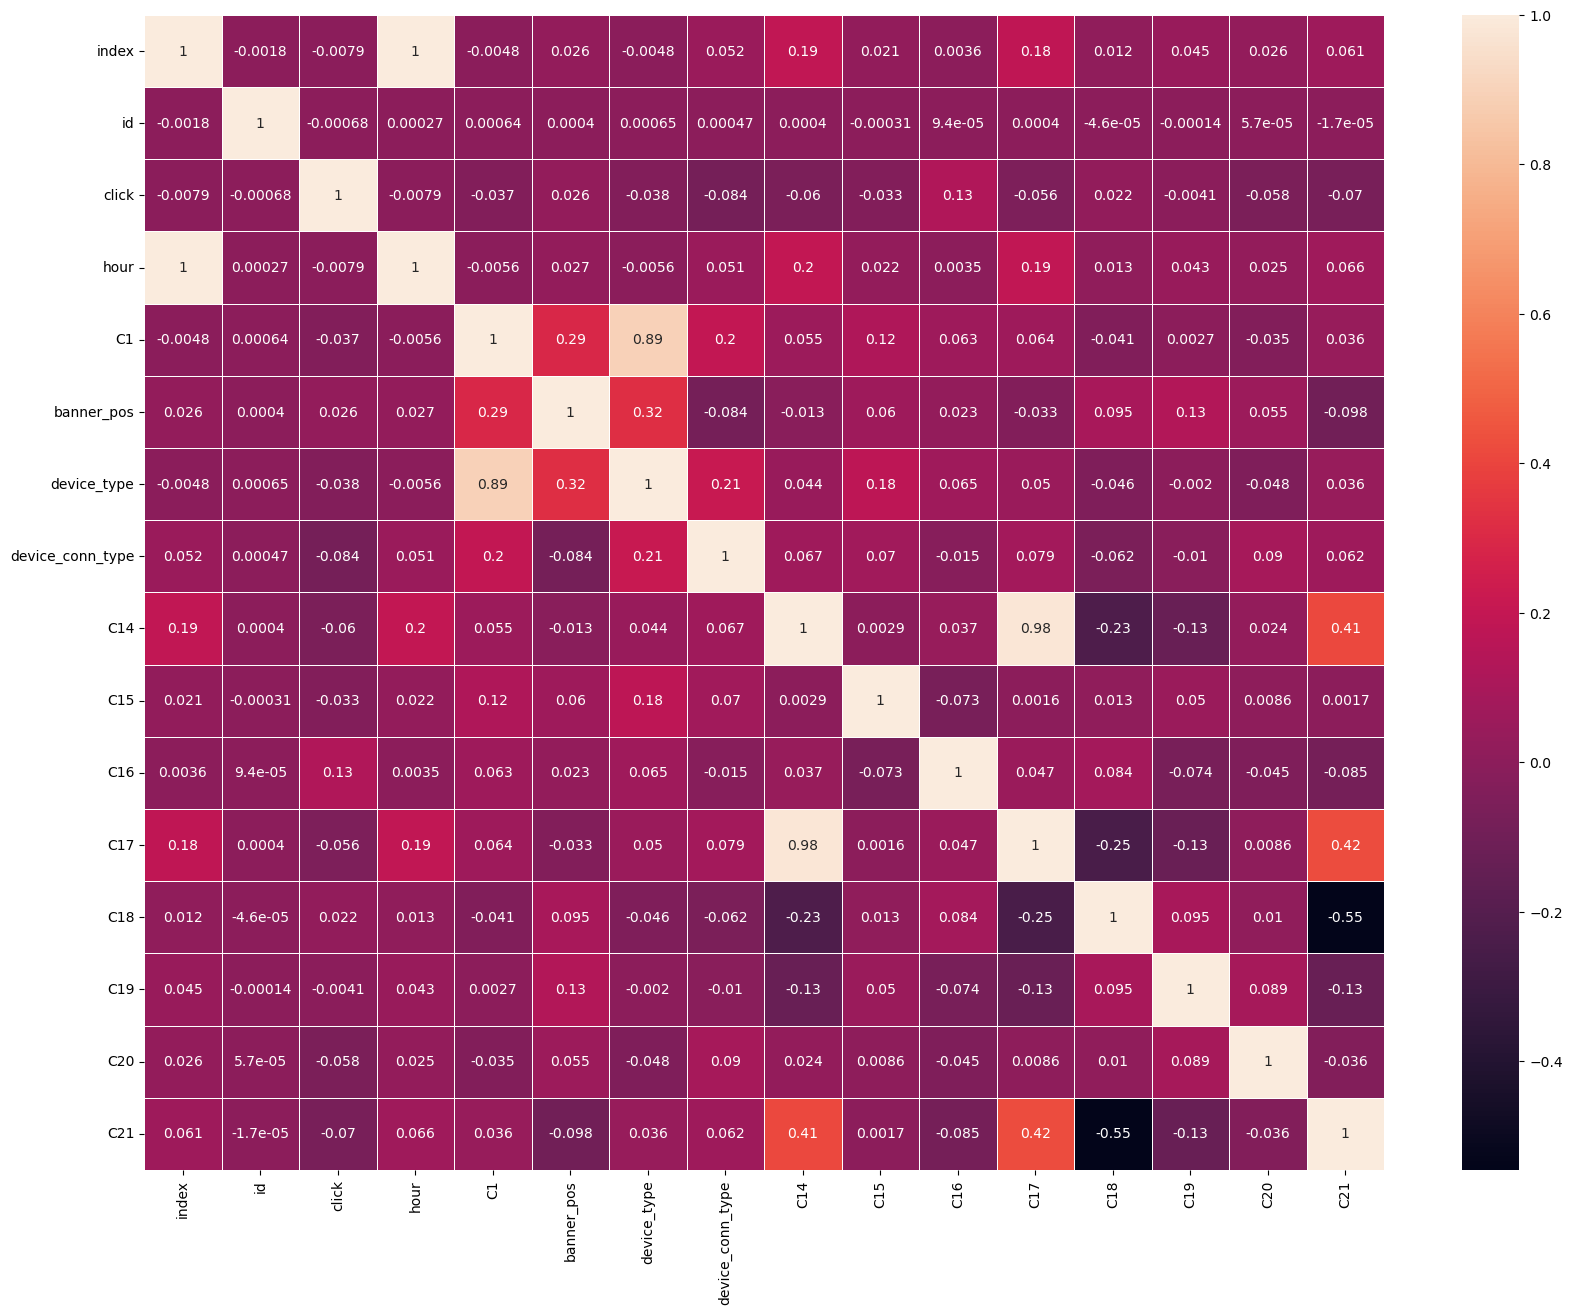

In [18]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)